In [7]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from warnings import filterwarnings
from wordcloud import WordCloud
filterwarnings('ignore')
from scipy import stats

In [8]:
path = 'user_behavior_dataset.csv'
df = pd.read_csv(path)
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


In [11]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

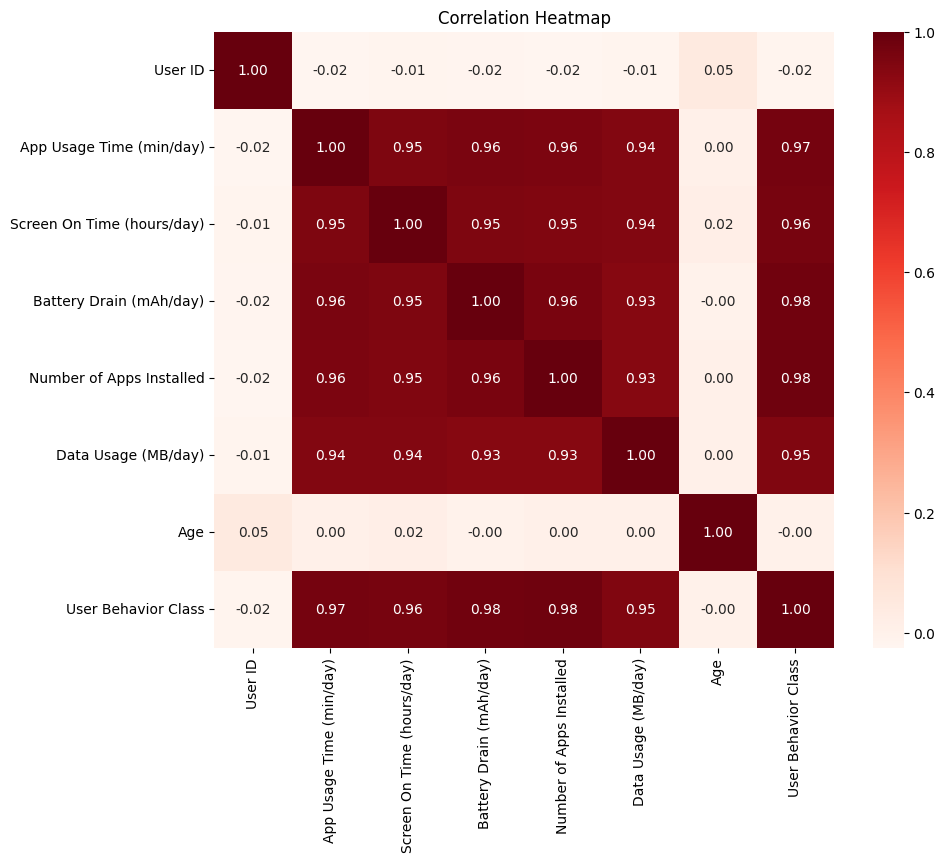

In [14]:
plt.figure(figsize=(10,8))
corr_matrix = df.drop(columns=['Operating System', 'Device Model', 'Gender']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Không có sự khác biệt giữa App Usage Time, Screen On Time, và Battery Drain giữa nam và nữ (kiểm định t).

# Perform t-tests for App Usage Time, Screen On Time, and Battery Drain
alpha = 0.05

variables = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)']

for var in variables:
  male_data = df[df['Gender'] == 'Male'][var]
  female_data = df[df['Gender'] == 'Female'][var]
  t_statistic, p_value = stats.ttest_ind(male_data, female_data)

  print(f"T-test for {var}:")
  print(f"  T-statistic: {t_statistic}")
  print(f"  P-value: {p_value}")

  if p_value < alpha:
    print(f"Trị số p = {p_value} < {alpha} nên bác bỏ H0")
  else:
    print(f"Trị số p = {p_value} >= {alpha} nên chấp nhận H0")
  print("-" * 20)

T-test for App Usage Time (min/day):
  T-statistic: -0.12022667726980892
  P-value: 0.904338182812825
Trị số p = 0.904338182812825 >= 0.05 nên chấp nhận H0
--------------------
T-test for Screen On Time (hours/day):
  T-statistic: 0.09440784461385676
  P-value: 0.9248122785055038
Trị số p = 0.9248122785055038 >= 0.05 nên chấp nhận H0
--------------------
T-test for Battery Drain (mAh/day):
  T-statistic: 0.1656922950766838
  P-value: 0.868447088563884
Trị số p = 0.868447088563884 >= 0.05 nên chấp nhận H0
--------------------


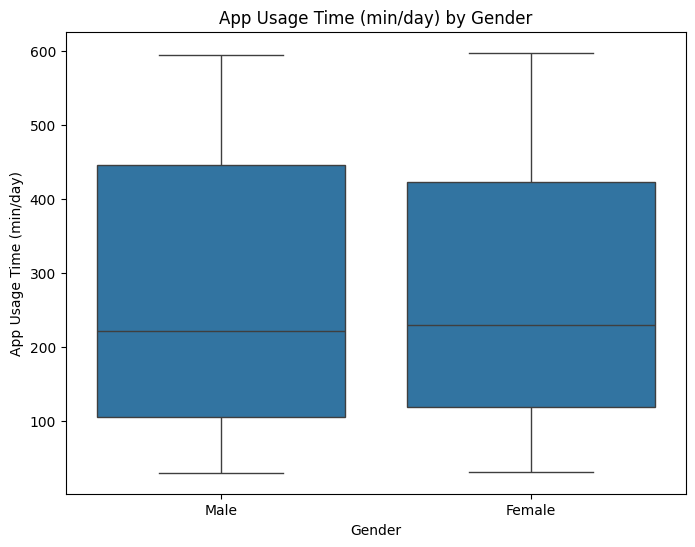

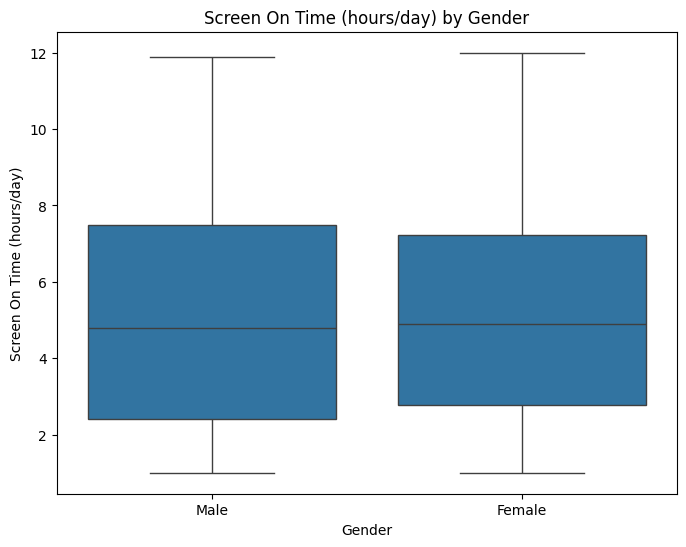

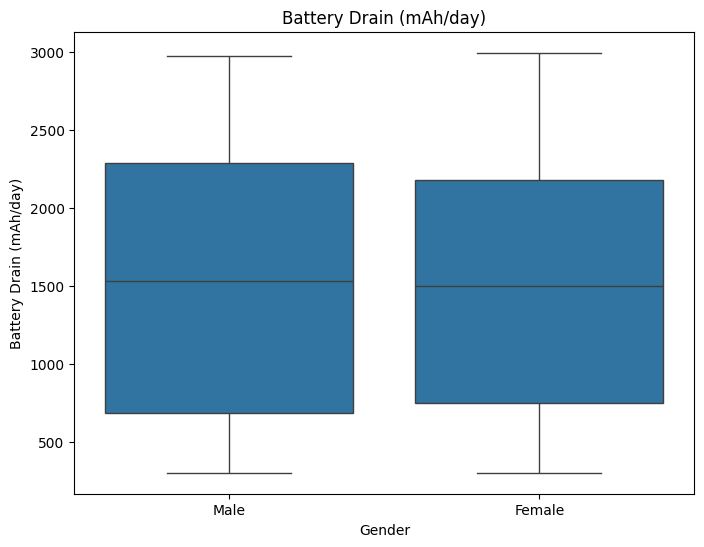

In [16]:
# Create a box plot to compare app installations between genders
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='App Usage Time (min/day)')
plt.title('App Usage Time (min/day) by Gender')
plt.xlabel('Gender')
plt.ylabel('App Usage Time (min/day)')
plt.show()

# Create a box plot to compare app installations between genders
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Screen On Time (hours/day)')
plt.title('Screen On Time (hours/day) by Gender')
plt.xlabel('Gender')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

# Create a box plot to compare app installations between genders
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Battery Drain (mAh/day)')
plt.title('Battery Drain (mAh/day)')
plt.xlabel('Gender')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

In [17]:
  # Create age groups for analysis
bins = [17, 25, 35, 45, 55, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

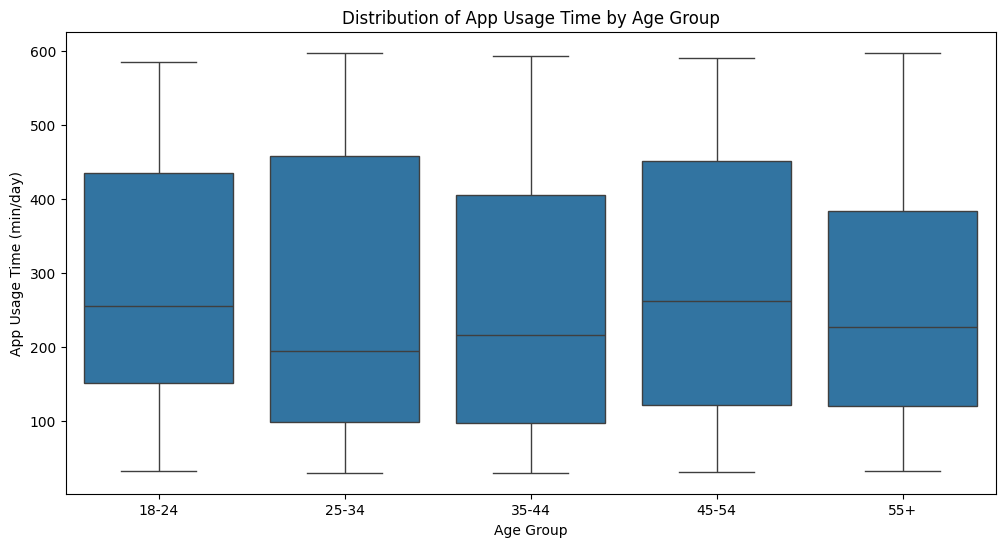

In [18]:
#vẽ biểu đồ hộp thể hiện phân phối của thời gian sử dụng ứng dụng của các nhóm tuổi

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='App Usage Time (min/day)', data=df)
plt.title('Distribution of App Usage Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('App Usage Time (min/day)')
plt.show()

In [19]:
#dùng kiểm định Levene để kiểm định phương sai thay đổi của Age group với App Usage Time (min/day)

# Perform Levene's test for equality of variances
from scipy.stats import levene

# Group data by age group
age_groups = df['Age Group'].unique()
usage_times_by_age = [df[df['Age Group'] == age_group]['App Usage Time (min/day)'] for age_group in age_groups]

# Perform Levene's test
statistic, p_value = levene(*usage_times_by_age)

print(f"Levene's test statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print(f"Trị số p = {p_value} < {alpha}\nNên Bác bỏ H0 => Có sự khác biệt phương sai")
else:
    print(f"Trị số p = {p_value} < {alpha}\nChấp nhận H0 => không có sự khác biệt phương sai")

Levene's test statistic: 0.7048504883289786
P-value: 0.5887738772059308
Trị số p = 0.5887738772059308 < 0.05
Chấp nhận H0 => không có sự khác biệt phương sai


In [20]:
# Kiểm định thời gian sử dụng ứng dụng ở các nhóm tuổi khác nhau (one way )

# Kiểm định ANOVA một chiều cho thời gian sử dụng ứng dụng theo nhóm tuổi
from scipy.stats import f_oneway

# Gom nhóm dữ liệu theo từng nhóm tuổi
age_groups = df['Age Group'].unique()
group_data = [df['App Usage Time (min/day)'][df['Age Group'] == group] for group in age_groups]

# Thực hiện kiểm định ANOVA một chiều
f_statistic, p_value = f_oneway(*group_data)

# In kết quả
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Xác định mức ý nghĩa
alpha = 0.05

# So sánh p-value với mức ý nghĩa
if p_value < alpha:
  print(f"Trị số p = {p_value} < {alpha} nên bác bỏ H0")
else:
  print(f"Trị số p = {p_value} >= {alpha} nên chấp nhận H0")

F-statistic: 1.419425233141688
P-value: 0.2257888885584367
Trị số p = 0.2257888885584367 >= 0.05 nên chấp nhận H0


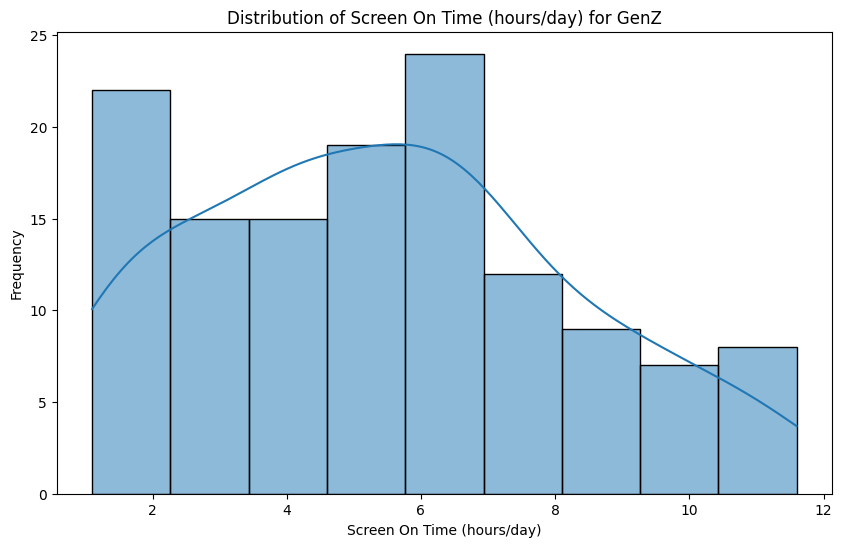

In [21]:
# Vẽ biểu đồ thể hiện thời gian sử dụng điện thoại của hằng ngày của GenZ

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Age Group']=='18-24']['Screen On Time (hours/day)'], kde=True)
plt.title('Distribution of Screen On Time (hours/day) for GenZ')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.show()

In [22]:
# thời gian sử dụng điện thoại hằng ngày của GenZ khộng thấp hơn 5h/ngày.(kiểm định t)

# Giả thuyết không (H0): thời gian sử dụng điện thoại hằng ngày của GenZ >= 5h/ngày
# Giả thuyết thay thế (H1): thời gian sử dụng điện thoại hằng ngày của GenZ < 5h/ngày

# Lấy dữ liệu thời gian sử dụng điện thoại của GenZ
genz_screen_time = df[df['Age Group'] == '18-24']['Screen On Time (hours/day)']

# Kiểm định một mẫu
t_statistic, p_value = stats.ttest_1samp(genz_screen_time, 5, alternative='less')

# In kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Xác định mức ý nghĩa
alpha = 0.05

# So sánh p-value với mức ý nghĩa
if p_value < alpha:
  print(f"Trị số p = {p_value} < {alpha} nên bác bỏ H0")
else:
  print(f"Trị số p = {p_value} >= {alpha} nên chấp nhận H0")

T-statistic: 1.7742390127061345
P-value: 0.9608177423207267
Trị số p = 0.9608177423207267 >= 0.05 nên chấp nhận H0


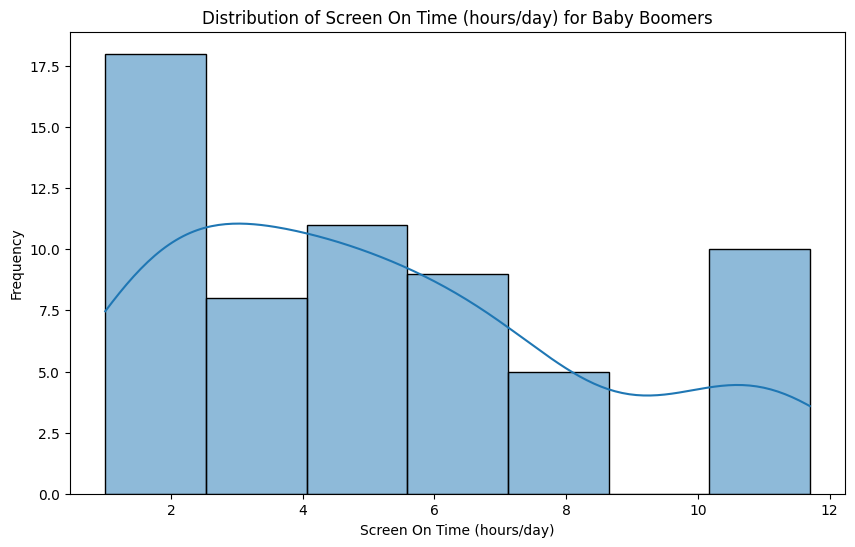

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Age Group']=='55+']['Screen On Time (hours/day)'], kde=True)
plt.title('Distribution of Screen On Time (hours/day) for Baby Boomers')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Giả thuyết không (H0): thời gian sử dụng điện thoại hằng ngày của Baby Boomers <= 3 tiếng
# Giả thuyết thay thế (H1): thời gian sử dụng điện thoại hằng ngày của Baby Boomers > 3 tiếng

# Lấy dữ liệu thời gian sử dụng điện thoại của Baby Boomers (nhóm tuổi 55+)
baby_boomers_screen_time = df[df['Age Group'] == '55+']['Screen On Time (hours/day)']

# Kiểm định một mẫu
t_statistic, p_value = stats.ttest_1samp(baby_boomers_screen_time, 3, alternative='greater')

# In kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Xác định mức ý nghĩa
alpha = 0.05

# So sánh p-value với mức ý nghĩa
if p_value < alpha:
  print(f"Trị số p = {p_value} < {alpha} nên bác bỏ H0")
else:
  print(f"Trị số p = {p_value} >= {alpha} nên chấp nhận H0")

T-statistic: 5.347128453647275
P-value: 7.322828616673975e-07
Trị số p = 7.322828616673975e-07 < 0.05 nên bác bỏ H0


In [25]:
# Phân nhóm dữ liệu theo hệ điều hành
android_battery = df[df['Operating System'] == 'Android']['Battery Drain (mAh/day)']
ios_battery = df[df['Operating System'] == 'iOS']['Battery Drain (mAh/day)']

# Thực hiện kiểm định t
t_statistic, p_value = stats.ttest_ind(android_battery, ios_battery)

# In kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
# So sánh p-value với mức ý nghĩa
if p_value < alpha:
  print(f"Trị số p = {p_value} < {alpha} nên bác bỏ H0")
else:
  print(f"Trị số p = {p_value} >= {alpha} nên chấp nhận H0")

T-statistic: -1.06718724967966
P-value: 0.28625625395745274
Trị số p = 0.28625625395745274 >= 0.05 nên chấp nhận H0


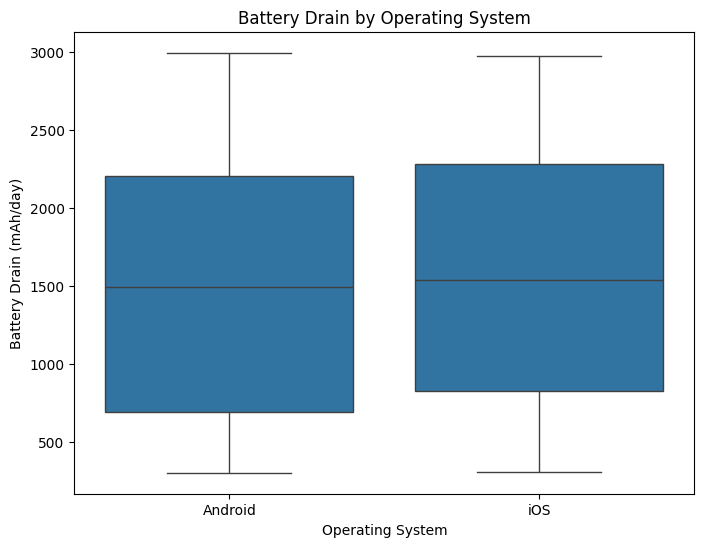

In [26]:
# Vẽ boxplot cho mức độ tiêu hao pin giữa hai hệ điều hành.

plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating System', y='Battery Drain (mAh/day)', data=df)
plt.title('Battery Drain by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()